In [1]:
from LIMxCMBL.init import *

In [2]:
from tqdm import trange

In [3]:
import matplotlib.pyplot as plt

In [4]:
c1 = plt.cm.rainbow(np.linspace(0, 1, len(deltas)))[::-1]
c2 = plt.cm.rainbow(np.linspace(0, 1, len(chibs)))

In [5]:
print(chibs)

[1.00000000e+01 5.29752115e+01 9.59504230e+01 1.38925634e+02
 1.81900846e+02 2.24876057e+02 2.67851269e+02 3.10826480e+02
 3.53801692e+02 3.96776903e+02 4.39752115e+02 4.82727326e+02
 5.25702538e+02 5.68677749e+02 6.11652961e+02 6.54628172e+02
 6.97603384e+02 7.40578595e+02 7.83553807e+02 8.26529018e+02
 8.69504230e+02 9.12479441e+02 9.55454653e+02 9.98429864e+02
 1.04140508e+03 1.08438029e+03 1.12735550e+03 1.17033071e+03
 1.21330592e+03 1.25628113e+03 1.29925634e+03 1.34223156e+03
 1.38520677e+03 1.42818198e+03 1.47115719e+03 1.51413240e+03
 1.55710761e+03 1.60008282e+03 1.64305804e+03 1.68603325e+03
 1.72900846e+03 1.77198367e+03 1.81495888e+03 1.85793409e+03
 1.90090931e+03 1.94388452e+03 1.98685973e+03 2.02983494e+03
 2.07281015e+03 2.11578536e+03 2.15876057e+03 2.20173579e+03
 2.24471100e+03 2.28768621e+03 2.33066142e+03 2.37363663e+03
 2.41661184e+03 2.45958705e+03 2.50256227e+03 2.54553748e+03
 2.58851269e+03 2.63148790e+03 2.67446311e+03 2.71743832e+03
 2.76041354e+03 2.803388

In [6]:
c1.shape

(128, 4)

  0%|          | 0/100 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


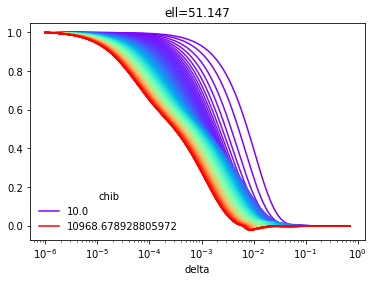

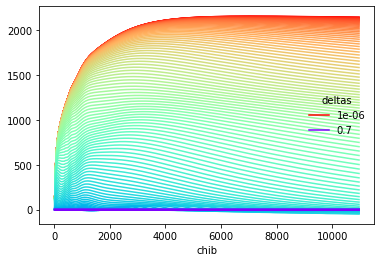

 27%|██▋       | 27/100 [00:01<00:03, 20.44it/s]

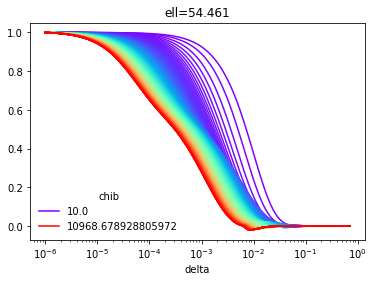

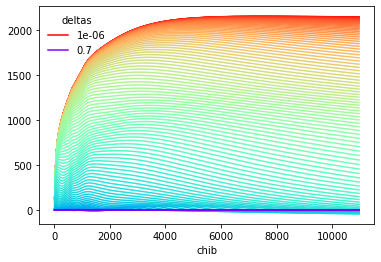

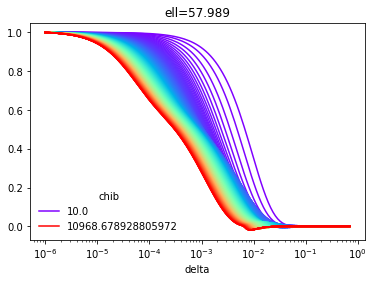

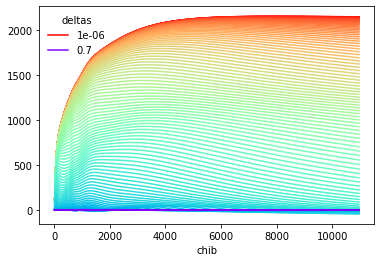

100%|██████████| 100/100 [00:03<00:00, 25.77it/s]

29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
oup = np.zeros((len(ells), len(chibs), len(deltas)), dtype=np.float128)
for ell_idx in trange(len(ells)):
    ell = ells[ell_idx]
    try:
        oup_fname = '/scratch/users/delon/LIMxCMBL/NON_LIN_dkparp_integral/ell_idx_%d.npy'%(ell_idx)
        oup[ell_idx] = np.load(oup_fname)
#         if(ell_idx % 10 !=0):
#             continue
    #     plt.figure(figsize=(8.5,11))
        for chib_idx, c in enumerate(c2):
            plt.plot(deltas, 
                     oup[ell_idx][chib_idx]/np.max(oup[ell_idx][chib_idx], axis=-1), 
                     label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
                     c=c)
        plt.xlabel('delta')
        plt.xscale('log')
        plt.legend(frameon=False, title='chib')
        plt.title('ell=%.3f'%(ell))
        plt.show()

    #     plt.figure(figsize=(8.5,22))
        for i, c in enumerate(c1):
            plt.plot(chibs, 
                     oup[ell_idx,:,i], 
                     label=deltas[i] if (i ==0 or i == len(c1)-1) else None, 
                     c=c)

        plt.xlabel('chib')
        plt.legend(frameon=False, title='deltas')
        plt.show()
    except:
        print(ell_idx)

In [ ]:
for delta_idx in range(len(deltas)):
    if(delta_idx % 20 != 0):
        continue
    for chib_idx in range(len(chibs)):
        plt.plot(ells, 
                 oup[:,chib_idx,delta_idx], 
                 label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
                 c=c2[chib_idx])
    plt.legend(frameon=False, title='chib', loc='upper right')
    plt.xlabel('ell')
    plt.xscale('log')
    plt.title('delta=%.3e'%(deltas[delta_idx]))
    plt.show()

In [ ]:
for chib_idx in range(len(chibs)):
    if(chib_idx % 10 != 0):
        continue
    for delta_idx in range(len(deltas)):
        plt.plot(ells, 
                 oup[:,chib_idx,delta_idx], 
                 label=deltas[delta_idx] if (delta_idx ==0 or delta_idx == len(c1)-1) else None, 
                 c=c1[delta_idx])
    plt.legend(frameon=False, title='delta', loc='upper right')
    plt.xlabel('ell')
    plt.xscale('log')
    plt.title('chib=%.3e'%(chibs[chib_idx]))
    plt.show()

In [ ]:
oup.shape

In [ ]:
np.save('/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/inner_dkparp_integral_NONLIN.npy', oup)